In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter

In [2]:
fname = '../../DataReduction/FullSes19SeptBCyg_20240920T000849.fit'

In [3]:
fits.getheader(fname)

SIMPLE  =                    T                                                  
BITPIX  =                  -32 / bits per data value                            
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =               163146 / Length of data axis 1                          
EXPTIME =                  300 / [s] Total observation duration                 
DATE-OBS= '2024-09-20T00:06:19.436' / Date of observation start                 
BSCALE  =                    1 / linear factor in scaling equation              
BZERO   =                    0 / zero point in scaling equation                 
EXPOSURE=                  300 / [s] Total time of exposure                     
EXPTIME2= '1 x 300 s' / Exposure decomposition                                  
JD-OBS  =         2460573.5044 / JD start observation                           
JD-MID  =   2460573.5060999999 / JD mid observation                             
CRPIX1  =                   

In [4]:
b = fits.getval(fname,"CRVAL1")
m = fits.getval(fname,"CDELT1")

In [5]:
y = fits.getdata(fname)

In [6]:
x = m*np.arange(len(y))+b

(0.0, 5.0)

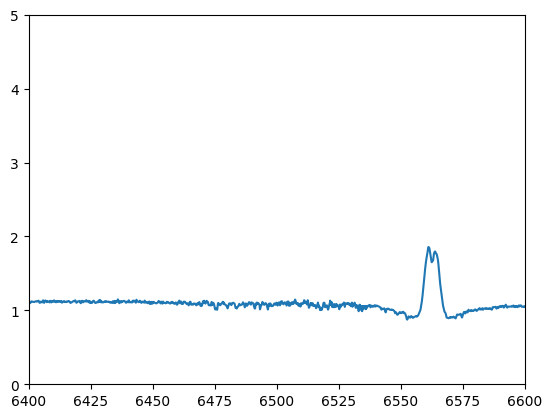

In [7]:
plt.plot(x,y)

plt.xlim(6400,6600)
plt.ylim(0,5)

In [51]:
y = fits.getdata(fname)
y_new=y.tolist()
y_filt=median_filter(y_new,10)
x = m*np.arange(len(y))+b

mask_alpha=np.abs(6562.8-x)>100
mask_beta=np.abs(4861.33333333333-x)>40
mask_gamma=np.abs(4367.23-x)>50 #H_gamma está corrido
mask=mask_alpha&mask_beta&mask_gamma


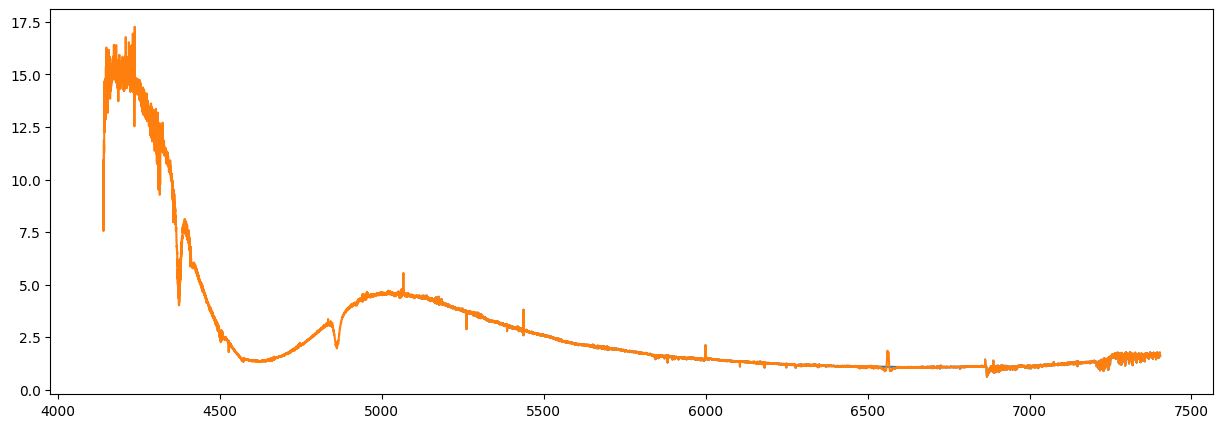

In [52]:
plt.figure(figsize=(15,5))
plt.plot(x[mask][39500:],y_filt[mask][39500:])

plt.plot(x,y_filt)

#plt.axvline(4367.23)

#plt.xlim(4000,4800)
#plt.ylim(0,5)

In [53]:
modelo = fitter(models.Chebyshev1D(25),x[mask][39500:],y_filt[mask][39500:])

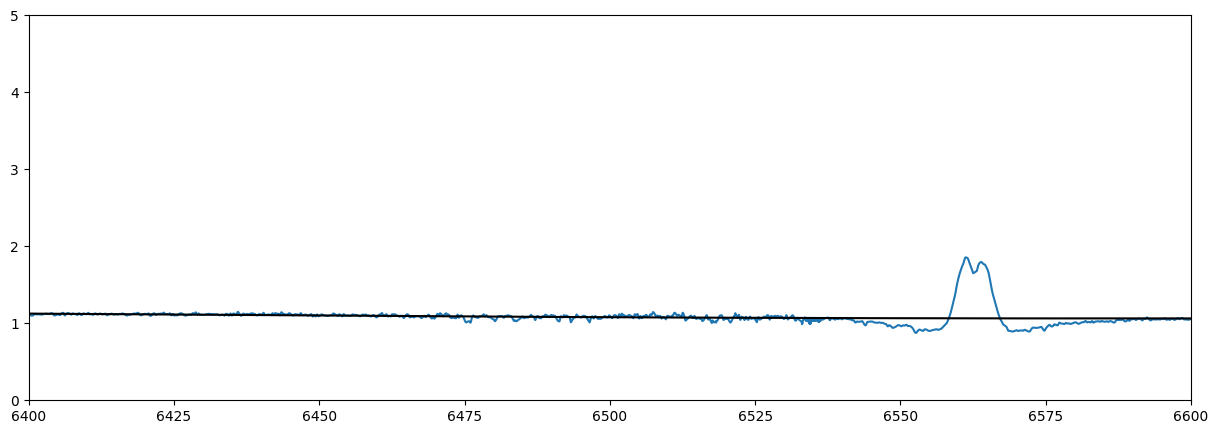

In [54]:
plt.figure(figsize=(15,5))
plt.plot(x,y)
#plt.plot(x,y_filt)
plt.plot(x,modelo(x),c='k')


plt.xlim(6400,6600)
plt.ylim(0,5)
plt.margins(x=0)

(0.0, 2.0)

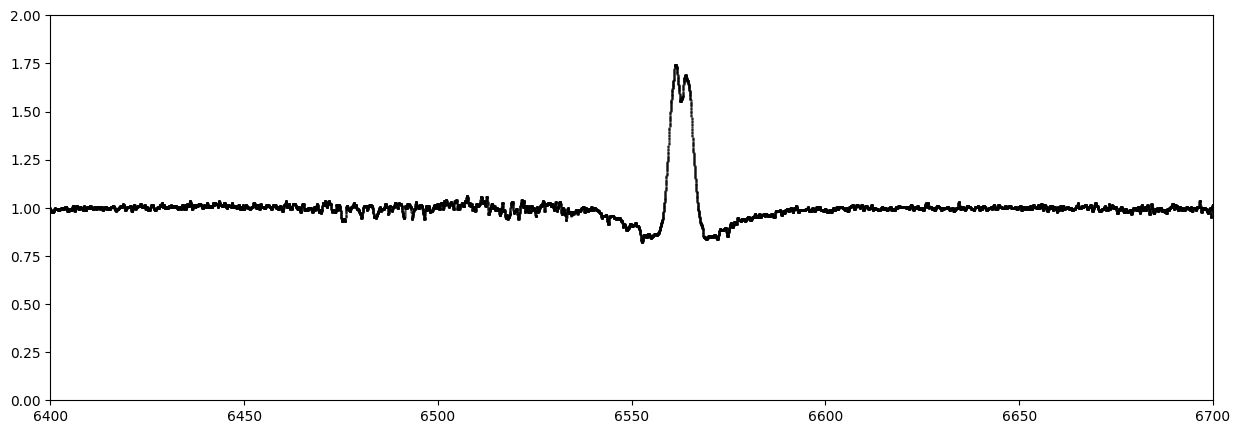

In [57]:
plt.figure(figsize=(15,5))
plt.scatter(x,y_filt/modelo(x),c='k',s=1,alpha=0.5)
plt.xlim(6400,6700)
plt.ylim(0,2)